# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

- The marketing campaign represents **17 campaigns** that occured between **May 2008 and November 2010**,
corresponding to a total of **79354 contacts**. 

- During these phone campaigns, an attractive long-term deposit
application, with good interest rates, was offered. For each
contact, a large number of attributes was stored (e.g. see
Table 2) and if there was a success (the target variable).

- For the whole database considered, there were **6499
successes (8% success rate)**.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
# Add environment variable to handle MKL known issue causing kernel crash
from dotenv import load_dotenv
load_dotenv()

# Add warning class to suppress warnings for readability
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
default = pd.get_option('display.max_columns')
pd.set_option('display.max_columns', 500)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
pd.set_option('display.max_columns', default)

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [8]:
objects = df.select_dtypes(['object']).columns
for o in objects:
    df[o] = df[o].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [9]:
# examine the summary statistics on numeric features
df.describe(exclude = 'category').T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [10]:
# examine the summary statistics on non-numeric features
df.describe(include = 'category').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [11]:
import numpy as np

In [12]:
# examine the data for any cleaning required
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
# examine any duplicates
df[df.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [14]:
# 24 rows returned indicating 12 duplicate records to remove
before = df.shape[0]
df.drop_duplicates(inplace=True)
print(f'confirm removed the correct # rows: {before - df.shape[0]}')

confirm removed the correct # rows: 12


In [15]:
# examine the data for any cleaning required
#numeric = df.select_dtypes(exclude = 'category')
#numeric.hist(bins = 10, layout = (5,2), figsize = (10, 15))
#np.isinf(numeric).sum()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
sns.set_theme(style="darkgrid", context="paper")

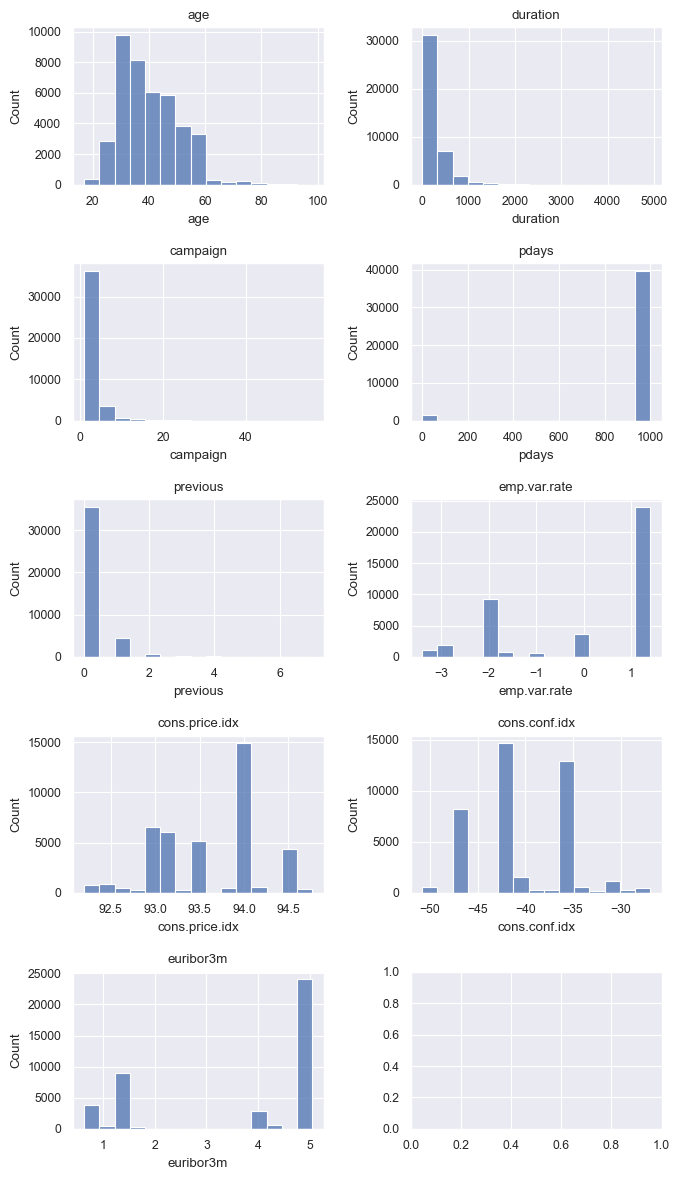

In [18]:
# examine the numeric data
numeric = df.select_dtypes(exclude = 'category')

fig, ax = plt.subplots(5, 2)
ax = ax.ravel()
fig.set_size_inches(7, 12)

#fig.suptitle('Numeric features')
cols = numeric.columns
for i in range(0, len(cols)-1):
    sns.histplot(data = numeric, x = cols[i], bins = 15, ax=ax[i])
    ax[i].set_title(f'{cols[i]}')
fig.tight_layout(h_pad=1.5, pad=1.5)
fig.show()

Text(0.5, 1.0, 'pdays')

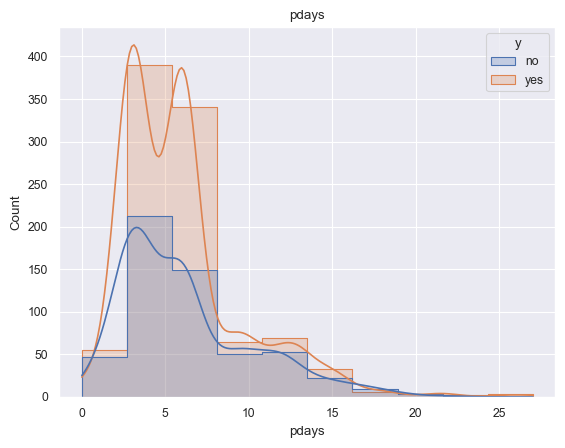

In [19]:
# to double-click on pdays - exclude 999 for clarity
fig = sns.histplot(data = df[df['pdays'] != 999], x = 'pdays', hue = 'y', bins = 10, 
                   stat = 'count', kde = True, multiple='layer', element = 'step')
fig.set_title(f'pdays')

Text(0.5, 1.0, 'campaign')

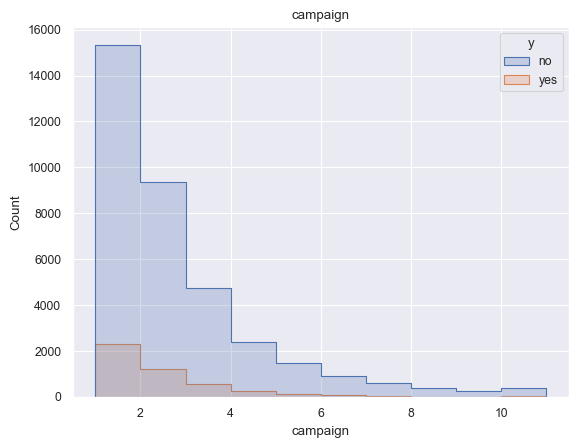

In [20]:
# to double-click on campaign - exclude over 12 for clarity
fig = sns.histplot(data = df[df['campaign'] < 12], x = 'campaign', hue = 'y', bins = 10, 
                   stat = 'count', kde = False, multiple='layer', element = 'step')
fig.set_title(f'campaign')

Initials thoughts:
- `Duration` should naturally be excluded for modelling (not available at prediction time ie. before contact)
- `Campaign` (# contacts in current campaign) does not show any discernable relation to target
- `Pdays` (# days since last campaign contact) while showing some relation in 3-7 days, only a handful of clients had a last campaign contact (<2000) compared to the majority who are 'new' contacts
- `Previous` (# contacts in previous campaign) confirms the same as Pdays, showing majority clients were never contacted before
- The remaining socio-economic features may be worth keeping 

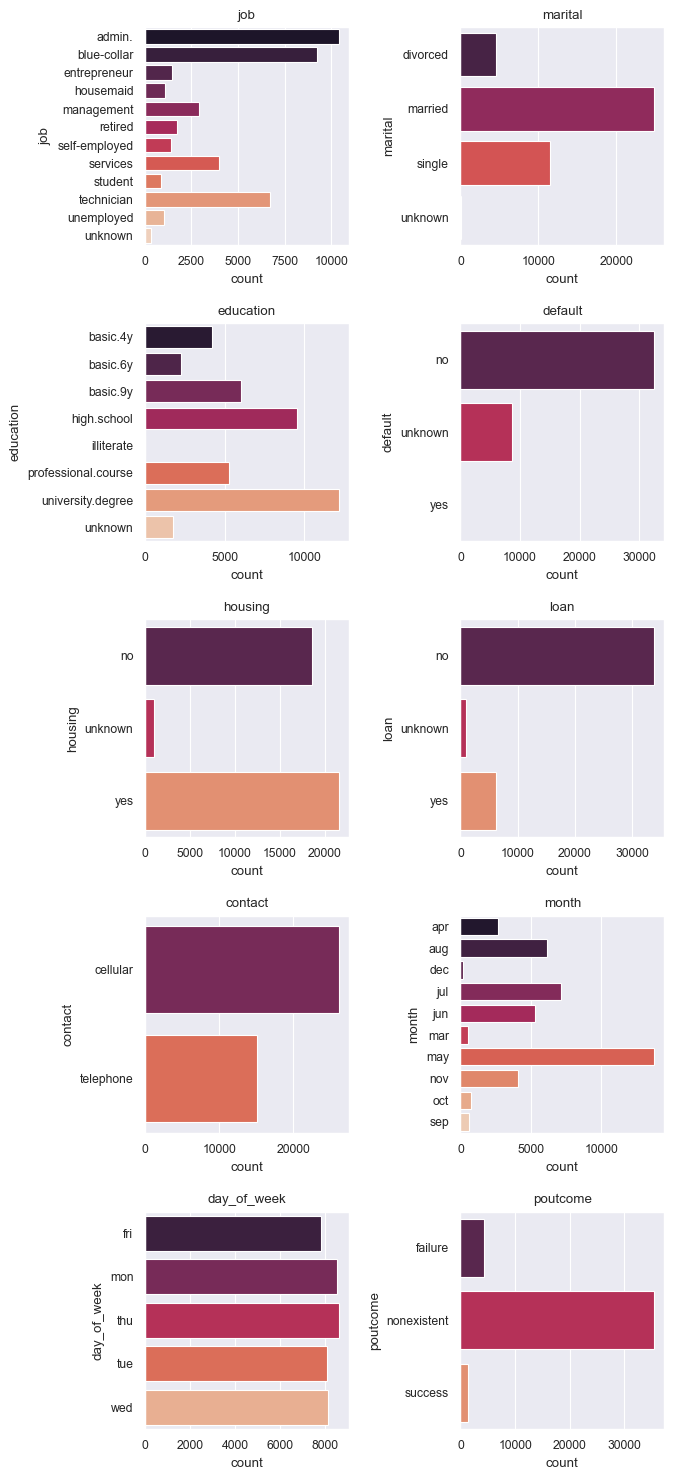

In [21]:
# examine the non-numeric data 
nonnumeric = df.select_dtypes(include = 'category')
#nonnumeric.plot(kind='bar', layout = (5,2), figsize = (10, 15), subplots = True)

fig, ax = plt.subplots(5, 2)
ax = ax.ravel()
fig.set_size_inches(7, 15)

#fig.suptitle('Non-numeric features')
cols = nonnumeric.columns
for i in range(0, len(cols)-1):
    sns.countplot(data = nonnumeric, y = cols[i], palette="rocket", orient='h', ax=ax[i])
    ax[i].set_title(f'{cols[i]}')
fig.tight_layout(h_pad=1.5, pad=1.5)
fig.show()

Initials thoughts:
- With exception of `poutcome` which primarily fall into nonexistent and likely unhelpful, the remaining features we should keep and let our model determine feature importance

In [22]:
numeric.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

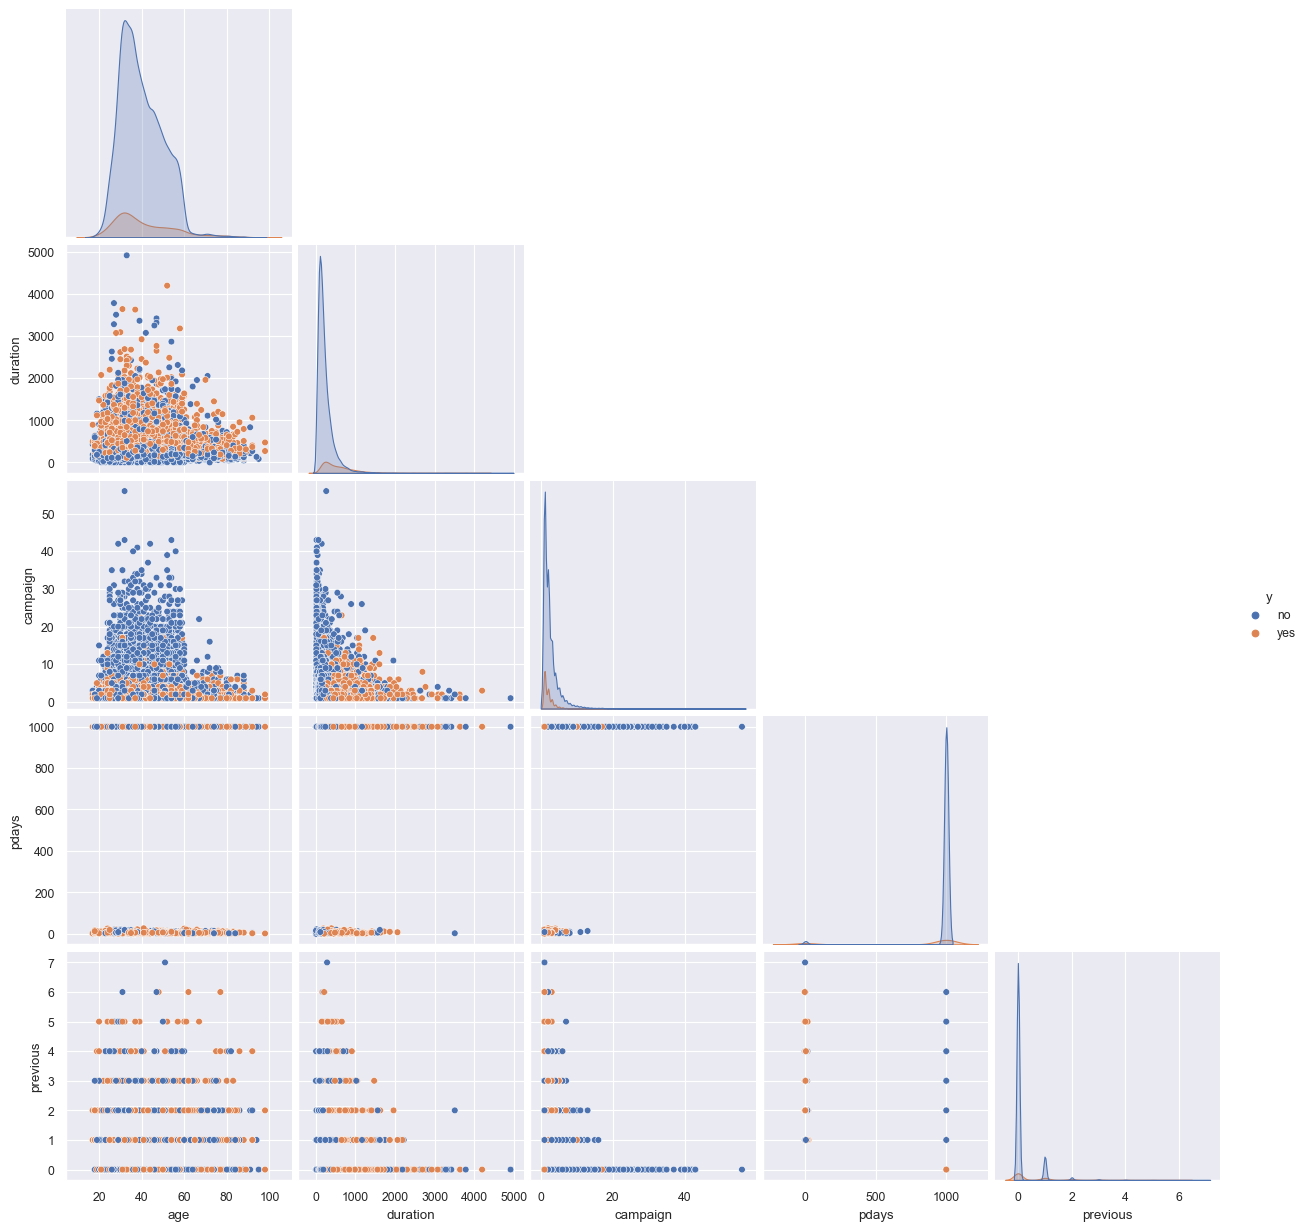

In [23]:
# pairplot of numeric features, excluding socioecoomic features for readability
sns.pairplot(data = df.select_dtypes(exclude = 'float64'), hue = 'y', corner=True)

Having solid confirmation of data cleanliness (no nulls and deduplication completed) and foundational understanding of how the data is shaped, we can proceed to next step in the CRISP-DM model.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

 - The business objective for the Portugese banking institution is to allocate resources effectively such that marketing campaigns maximize successful bank term deposit subscriptions while minimizing contacts (phone calls) required. 
 - Put another way, the business is ideally able to better target clients who would be interested in a term deposit so that it can either:
    1. deploy the same amount of contacts and yield more term deposits (bigger pot) or
    2. deploy less contacts but still yield the same amount of term deposits (if resources are scarce).

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  category
 2   marital         41176 non-null  category
 3   education       41176 non-null  category
 4   default         41176 non-null  category
 5   housing         41176 non-null  category
 6   loan            41176 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  category
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.idx   4

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

Here are the features and engineering/encoding/transformation we should complete:

- 0   `age` - standard scale 
- 1   `job` - one hot encode = 12 features
- 2   `marital` - one hot encode = 4 features
- 3   `education` -  one hot encode = 8 features
- 4   `default` - one hot encode = 3 features
- 5   `housing` -  one hot encode = 3 features
- 6   `loan` - one hot encode = 3 features
- 7   `contact` - one hot encode = 2 features
- 8   `month` - one hot encode = 12 features
- 9   `day_of_week` - one hot encode = 7 features
- 10  `duration` - *not included*
- 11  `campaign` - standard scale
- 12  `pdays` - standard scale
- 13  `previous` - standard scale
- 14  `poutcome` - one hot encode = 3 features
- 15  `emp.var.rate` - standard scale
- 16  `cons.price.idx` - standard scale
- 17  `cons.conf.idx` - standard scale
- 18  `euribor3m` - standard scale
- 19  `nr.employed` - standard scale
- 20  `y` - leave as is (unless model requires binary representation)

As a side note we will have a fair share of additional columns (47 new = 57 created from OHE - 10 original categorical columns) as a result of encoding categorical columns and will want to use SFS and/or RFE to aid in selecting a subset of features.

Further to this, features 15 - 19 require additional understanding on whether the full range of values are represented in the data. If not then if new unseen data is beyond this range our model may provide subpar performance. We will investigate this if SFS and/or RFE deem these important enough for inclusion in our model.

We may explore polynomial representation (of numeric data) depending on initial results.

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [26]:
# define the columns in separate lists based on what needs which encoding
ohe_list = df.select_dtypes(include = 'category').drop(labels = 'y', axis = 1).columns
scale_list = df.select_dtypes(exclude = 'category').drop(labels = 'duration', axis = 1).columns

print(f'One Hot Enode the following: {ohe_list.to_list()}\nStandard Scale the following: {scale_list.to_list()}')

One Hot Enode the following: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Standard Scale the following: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [27]:
# create column transformer (note we will only apply these within the pipeline, not before train/test split)
scaler_ohe_transformer = make_column_transformer(
    (OneHotEncoder(drop = 'if_binary', handle_unknown = 'infrequent_if_exist'),
        ohe_list),
    (StandardScaler(),
        scale_list),
    remainder = 'drop',
    verbose_feature_names_out = False   
)

# test the transformation
df_transform = pd.DataFrame(scaler_ohe_transformer.fit_transform(df), columns=scaler_ohe_transformer.get_feature_names_out())

default = pd.get_option('display.max_columns')
pd.set_option('display.max_columns', 500)
df_transform.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.533143,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.629107,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.290177,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.002284,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.533143,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695


In [28]:
# confirm feature count after transformation
print(f'# of features after transformation: {df_transform.shape[1]}')

# of features after transformation: 61


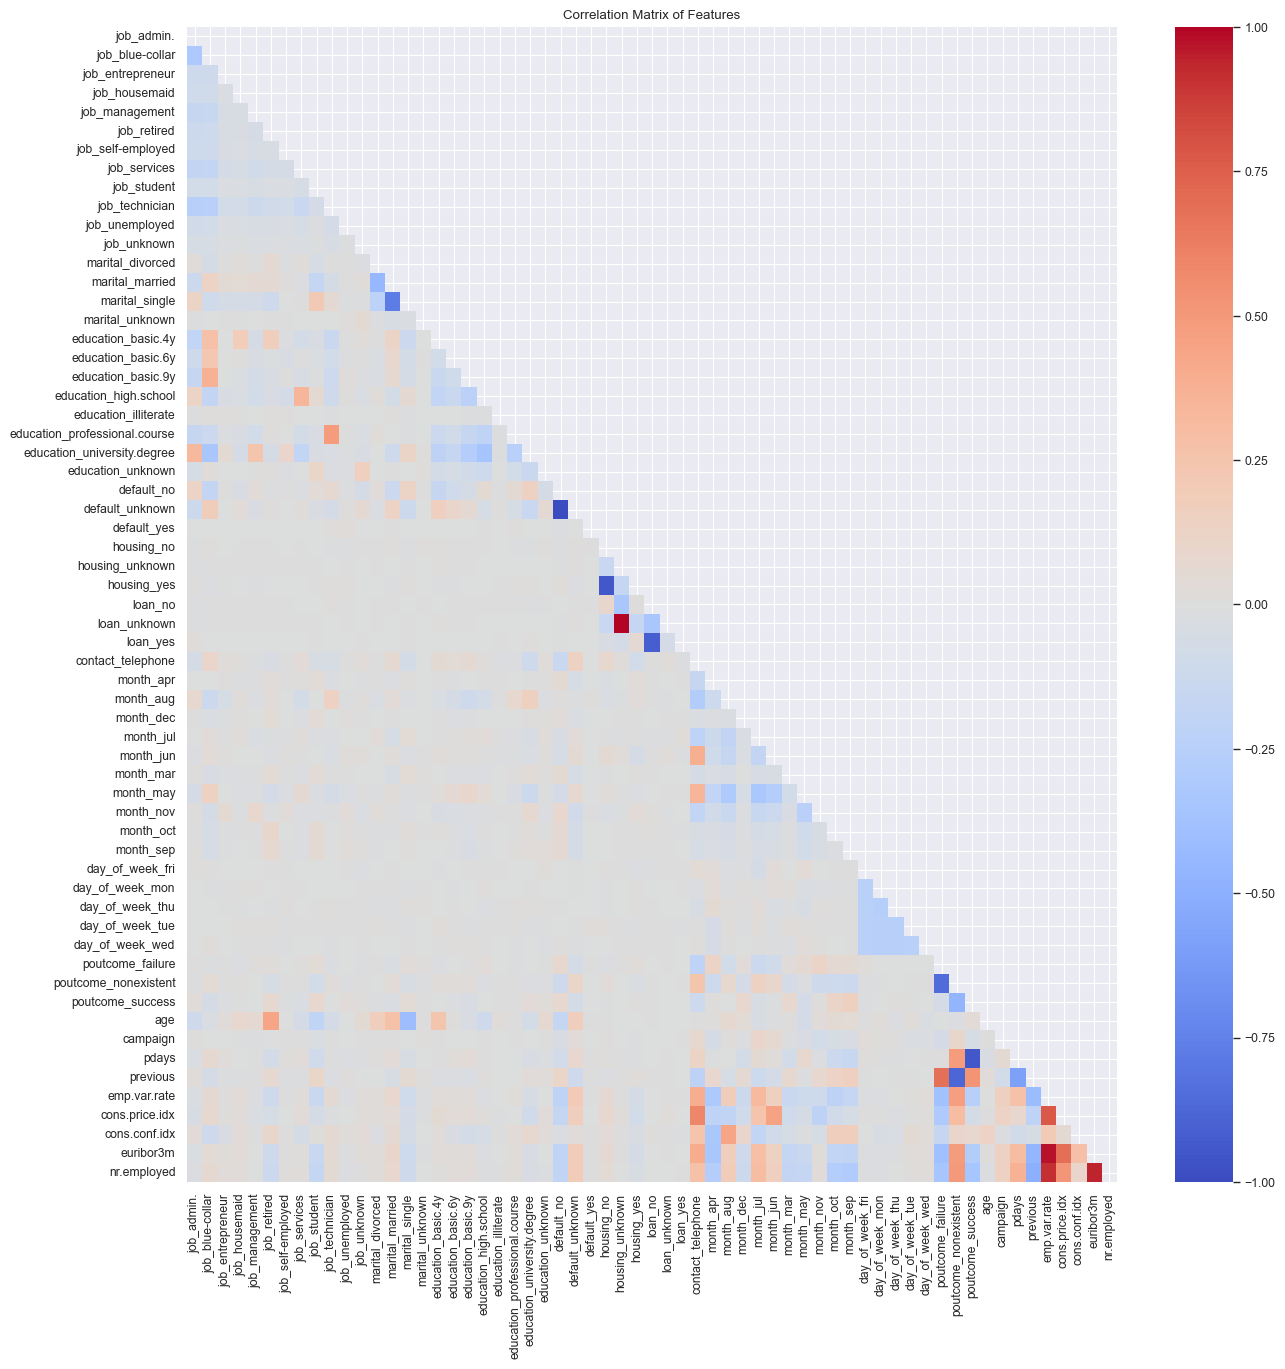

In [29]:
# while we are here with all values expressed as numeric we can understand correlation across all features
plt.figure(figsize=(15,15))

# create and plot a correlation matrix
mask = np.triu(np.ones_like(df_transform.corr(), dtype=bool))
sns.heatmap(df_transform.corr(), annot=False, mask=mask, vmin = -1, vmax= 1, cmap="coolwarm")
plt.title('Correlation Matrix of Features')
plt.show()

Some high level observations of note:
- Correlations between socio-economic features within each other as expected
- Correlations between housing and loan
- Correlations between education and job
- Correlations between default and socio-economic features
- Correlations between various features on previous campaigns

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

As mentioned earlier:
- Data transformations will be conducted within a pipeline
- Therefore a train/test split **without** transformation will be conducted here
- The test split will serve as a final hold-out set
- Hold-out to be used to validate the final model performance on 'un-seen' data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# transform the target variable y to be binary to be sure 'yes' is chosen as positive class
df['y_binary'] = np.where(df['y'] == 'yes', 1, 0)
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_binary
30299,28,admin.,single,university.degree,no,yes,no,cellular,apr,thu,249,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no,0
37060,30,self-employed,single,university.degree,no,yes,no,cellular,jul,wed,90,3,999,0,nonexistent,-2.9,92.469,-33.6,1.029,5076.2,no,0
25795,31,entrepreneur,married,high.school,no,yes,no,cellular,nov,wed,360,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no,0
32661,36,admin.,married,university.degree,no,no,no,cellular,may,mon,112,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no,0
23348,53,blue-collar,married,unknown,no,yes,no,cellular,aug,wed,94,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no,0


In [32]:
# define our features and target first
X = df.drop(['y', 'duration', 'y_binary'], axis = 1)
y = df['y_binary']

In [33]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size = .3,
                                   stratify = y,
                                   random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Intuitively the baseline performance to improve upon is the proportion of data with the target class label, or in the case here the rate of successful bank deposit subscriptions. **As outlined in the paper this was 8%.**

That being said we can also create a dummy classifier (ignoring feature inputs) to:
- Show this is the case if we set the classifier based on the target class label
- Show performance if we picked at random

Note that accuracy will be considered in tandem with F1 Score and ROC AUC when conducting further modelling.

In [34]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve, f1_score, roc_auc_score, classification_report

In [35]:
# manually transform X_train and X_test in the absence of our pipeline at this point
X_train_t = pd.DataFrame(scaler_ohe_transformer.fit_transform(X_train), columns=scaler_ohe_transformer.get_feature_names_out())
X_test_t = pd.DataFrame(scaler_ohe_transformer.fit_transform(X_test), columns=scaler_ohe_transformer.get_feature_names_out())

In [36]:
# constant ie. 1
clf = DummyClassifier(strategy = 'constant', constant = 1, random_state = 42
                       ).fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f'Accuracy\nTrain score: {train_score}\nTest score: {test_score}\n')
# create predictions for additional scoring
y_train_pred = clf.predict(X_train_t)
y_test_pred = clf.predict(X_test_t)

# ROC AUC scores
train_score = roc_auc_score(y_train, y_train_pred)
test_score = roc_auc_score(y_test, y_test_pred)
print(f'ROC AUC\nTrain score: {train_score:.2f}\nTest score: {test_score:.2f}\n')

# Classification report
print(f'Classification report')
print(classification_report(y_test, y_test_pred, zero_division=0))

Accuracy
Train score: 0.1126530895465427
Test score: 0.11268517768963004

ROC AUC
Train score: 0.50
Test score: 0.50

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10961
           1       0.11      1.00      0.20      1392

    accuracy                           0.11     12353
   macro avg       0.06      0.50      0.10     12353
weighted avg       0.01      0.11      0.02     12353



In [37]:
# random
clf = DummyClassifier(strategy = 'uniform', random_state = 42
                       ).fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f'Accuracy\nTrain score: {train_score}\nTest score: {test_score}\n')
# create predictions for additional scoring
y_train_pred = clf.predict(X_train_t)
y_test_pred = clf.predict(X_test_t)

# ROC AUC scores
train_score = roc_auc_score(y_train, y_train_pred)
test_score = roc_auc_score(y_test, y_test_pred)
print(f'ROC AUC\nTrain score: {train_score:.2f}\nTest score: {test_score:.2f}\n')

# Classification report
print(f'Classification report')
print(classification_report(y_test, y_test_pred, zero_division=0))


Accuracy
Train score: 0.5006418485237484
Test score: 0.5002833319841334

ROC AUC
Train score: 0.50
Test score: 0.50

Classification report
              precision    recall  f1-score   support

           0       0.89      0.50      0.64     10961
           1       0.11      0.50      0.18      1392

    accuracy                           0.50     12353
   macro avg       0.50      0.50      0.41     12353
weighted avg       0.80      0.50      0.59     12353



In other words, to improve:
- against status quo we would want to perform better than 8%,  
- against dummy classifier that would mean better than 11%, and
- against a random draw that would mean better than 50%

Note we can't baseline with strategy 'most_frequent' or 'prior' as that would mean predicting 'no' every time.

While this would produce great accuracy it would be counter-productive to our business objective as we would never contact anyone, and is therefore not a real baseline.

Additionally, our baseline F1-Score and Precision scores to improve on are 0.20 and 0.11 respectively.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [39]:
# train our model
lr = LogisticRegression(max_iter=1000).fit(X_train_t, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [40]:
# Accuracy
train_score = lr.score(X_train_t, y_train)
test_score = lr.score(X_test_t, y_test)
print(f'Accuracy\nTrain score: {train_score:.2f}\nTest score: {test_score:.2f}\n')
# create predictions for additional scoring
y_train_pred = lr.predict(X_train_t)
y_test_pred = lr.predict(X_test_t)

# ROC AUC scores
train_score = roc_auc_score(y_train, y_train_pred)
test_score = roc_auc_score(y_test, y_test_pred)
print(f'ROC AUC\nTrain score: {train_score:.2f}\nTest score: {test_score:.2f}\n')

# Classification report
print(f'Classification report')
print(classification_report(y_test, y_test_pred, zero_division=0))

Accuracy
Train score: 0.90
Test score: 0.90

ROC AUC
Train score: 0.61
Test score: 0.60

Classification report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10961
           1       0.66      0.21      0.32      1392

    accuracy                           0.90     12353
   macro avg       0.79      0.60      0.63     12353
weighted avg       0.88      0.90      0.88     12353



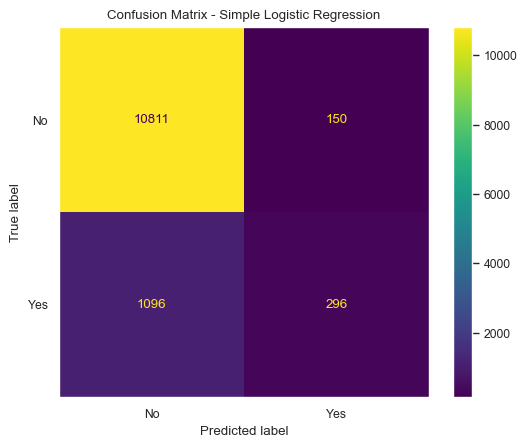

In [41]:
# confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['No', 'Yes'])
plt.title('Confusion Matrix - Simple Logistic Regression')
plt.grid(False)
# disp.plot()

In [42]:
# examinining the features of highest importance (positively correlated)
feature_names = X_train_t.columns
coefs = lr.coef_[0]
coefs_df = pd.DataFrame({'feature': feature_names, 'coef': coefs}, columns = ['feature', 'coef'])
coefs_df.sort_values(by = 'coef', ascending = False).head().T

,39,57,20,59,36
feature,month_mar,cons.price.idx,education_illiterate,euribor3m,month_dec
coef,1.267327,1.025225,0.562645,0.526353,0.432149


In [43]:
# examinining the features of highest importance (negatively correlated)
coefs_df.sort_values(by = 'coef', ascending = False).tail().T

,40,41,38,33,56
feature,month_may,month_nov,month_jun,contact_telephone,emp.var.rate
coef,-0.521225,-0.585672,-0.654742,-0.754267,-2.096146


Based on this crude first model, we can see F1 and ROC AUC scores could use improvement despite a high accuracy score.

We shall push forward to seek better performance.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [44]:
# build dictionary to hold results
results = {
    'Model' : [],
    'Accuracy' : [],
    'Precision' : [],
    'Recall' : [],
    'F1-Score' : [],
    'ROC AUC' : [],
    'Train Time' : [],
    'Inference Time' : []
}

In [45]:
# add intel patch to improve SVC performance
from sklearnex import patch_sklearn
patch_sklearn('SVC')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [46]:
# import our models of interest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [47]:
# define our models (and params)
models = {
    'KNN' : KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC()
}

In [48]:
import time
from sklearn import metrics

In [49]:
# fit and predict our models and track time to train and infer
for model_name, model in models.items():
  start_time = time.time()
  model.fit(X_train_t, y_train)
  train_time = time.time() - start_time

  start_time = time.time()
  y_pred = model.predict(X_test_t)
  inference_time = time.time() - start_time

  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1 = metrics.f1_score(y_test, y_pred)
  rocauc = metrics.roc_auc_score(y_test, y_pred)

  results['Model'].append(model_name)
  results['Accuracy'].append(accuracy)
  results['Precision'].append(precision)
  results['Recall'].append(recall)
  results['F1-Score'].append(f1)
  results['ROC AUC'].append(rocauc)
  results['Train Time'].append(train_time)
  results['Inference Time'].append(inference_time)

In [50]:
pd.DataFrame(results)

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,Train Time,Inference Time
0,KNN,0.893305,0.550409,0.290230,0.380056,0.630062,0.004081,0.943014
1,Decision Tree,0.820287,0.257611,0.316092,0.283871,0.600205,0.176361,0.005478
2,Logistic Regression,0.899134,0.663677,0.212644,0.322089,0.599479,0.602681,0.002408
3,SVM,0.901320,0.684435,0.230603,0.344976,0.608551,7.136757,0.097756


Based on the results above we have some intuition on which model may perform best:
- depending on metric objective
- if training speed is important
- if inference speed is important

As our business objective likely includes producing a list of clients to contact (and presumably not in real-time), we can focus our attention towards optimizing for the right metric.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Since we would like to maximize our resources to target only those who will accept (while ensuring we have a big enough pot), this effectively means we need to maximize:
- precision: to capture the right class confidently = TP / (TP + FP)
- recall: to capture a majority of the positive class = TP / (TP + FN)

Due to these two competing objectives, we will next use F1-score (weighted average of precision and recall) to balance both objectives in our search for an optimal model below.

**Define our feature selection method**

In [51]:
# import feature selection
# from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel

In [52]:
# reduce the feature size to optimize our search (useing SelectFromModel and LogisticRegression)
selector = SelectFromModel(
                estimator = LogisticRegression(max_iter=1000, penalty ='l1', solver='liblinear'), 
                max_features = 10 # l1 reduces to 50 features, try 10 to start
                ).fit(X_train_t, y_train)

In [53]:
# examine features have been selected by L1 regularization
feature_names = X_train_t.columns
coefs = selector.estimator_.coef_[0]
coefs_df = pd.DataFrame({'feature': feature_names, 'coef': coefs}, columns = ['feature', 'coef'])
coefs_df.sort_values(by = 'coef', ascending = False).T

,39,57,59,36,20,15,5,35,8,60,48,58,0,17,2,43,9,23,52,37,26,32,46,28,27,24,22,51,4,14,44,3,31,6,55,47,30,7,13,29,42,34,19,1,16,12,11,21,53,10,54,18,25,45,50,40,41,38,33,49,56
feature,month_mar,cons.price.idx,euribor3m,month_dec,education_illiterate,marital_unknown,job_retired,month_aug,job_student,nr.employed,day_of_week_wed,cons.conf.idx,job_admin.,education_basic.6y,job_entrepreneur,month_sep,job_technician,education_unknown,age,month_jul,default_yes,loan_yes,day_of_week_thu,housing_unknown,housing_no,default_no,education_university.degree,poutcome_success,job_management,marital_single,day_of_week_fri,job_housemaid,loan_unknown,job_self-employed,previous,day_of_week_tue,loan_no,job_services,marital_married,housing_yes,month_oct,month_apr,education_high.school,job_blue-collar,education_basic.4y,marital_divorced,job_unknown,education_professional.course,campaign,job_unemployed,pdays,education_basic.9y,default_unknown,day_of_week_mon,poutcome_nonexistent,month_may,month_nov,month_jun,contact_telephone,poutcome_failure,emp.var.rate
coef,1.303593,1.012726,0.552843,0.440326,0.365996,0.330621,0.314435,0.305465,0.207926,0.197161,0.126754,0.101601,0.046474,0.037342,0.033375,0.030873,0.019937,0.011472,0.005409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.002352,-0.004007,-0.00487,-0.006805,-0.025291,-0.026655,-0.032077,-0.034125,-0.037764,-0.049585,-0.052218,-0.062377,-0.077902,-0.094934,-0.103809,-0.10492,-0.117006,-0.120657,-0.122957,-0.131135,-0.20006,-0.20073,-0.214454,-0.216343,-0.383051,-0.482493,-0.552079,-0.607515,-0.755488,-0.866117,-2.088866


In [54]:
# examine and confirm features selected further by our max_features parameter
X_train_reduced = selector.transform(X_train_t)
feature_names = selector.get_feature_names_out()
X_train_reduced_df = pd.DataFrame(X_train_reduced, columns = feature_names)
X_train_reduced_df.head()

,contact_telephone,month_dec,month_jun,month_mar,month_may,month_nov,poutcome_failure,emp.var.rate,cons.price.idx,euribor3m
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.115904,-0.648967,0.231376
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.838925,-0.227667,0.774643
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.198042,-1.179046,-1.355792
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.838925,0.590761,0.773491
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.838925,0.590761,0.770610


**Define constructs to hold models, params, and results**

In [55]:
# define our metric table again, this time to capture the best tuned version of each algorithm
results_best = {
    'Model' : [],
    'Accuracy' : [],
    'Precision' : [],
    'Recall' : [],
    'F1-Score' : [],
    'ROC AUC' : [],
    'Train Time' : [],
    'Inference Time' : []
}

In [56]:
# define our models (and params)
models = {
    'KNN' : [KNeighborsClassifier(), 
            {#'model__metric' : ['euclidean'],
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance'],
            'model__p': [1, 2, 3]}],

    'Decision Tree' : [DecisionTreeClassifier(),
            {'model__max_depth': [2, 3, 4, 5],
            #'model__min_samples_split': list(range(2, 31, 2)),
            'model__criterion': ['gini', 'entropy', 'log_loss']}],
            #'model__min_samples_leaf': list(range(1, 30, 2))}],

    'Logistic Regression': [LogisticRegression(),
            {'model__C': [0.1, 1.0, 10.0, 100.0],
            'model__penalty': ['l1','l2'],
            'model__solver': ['liblinear'],
            'model__max_iter': [1000]}],

    'SVM': [SVC(),
            {'model__class_weight' : ['balanced'],
            'model__C': [0.1, 1.0, 10.0, 100.0],
            'model__kernel': ['rbf'], # 'linear', 'poly', #'sigmoid'],
            'model__coef0': [1],
            'model__gamma': [0.1, 1.0, 10.0, 100.0]}]
}

# commented out params to optimize run-time 

**Create our pipeline for each model type of interest**

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
# confirm dictionary contains the model and param
for model_name, model in models.items():
    print(f'Model: {model_name}\nEstimator: {model[0]}\nParams: {model[1]}')

Model: KNN
Estimator: KNeighborsClassifier()
Params: {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance'], 'model__p': [1, 2, 3]}
Model: Decision Tree
Estimator: DecisionTreeClassifier()
Params: {'model__max_depth': [2, 3, 4, 5], 'model__criterion': ['gini', 'entropy', 'log_loss']}
Model: Logistic Regression
Estimator: LogisticRegression()
Params: {'model__C': [0.1, 1.0, 10.0, 100.0], 'model__penalty': ['l1', 'l2'], 'model__solver': ['liblinear'], 'model__max_iter': [1000]}
Model: SVM
Estimator: SVC()
Params: {'model__class_weight': ['balanced'], 'model__C': [0.1, 1.0, 10.0, 100.0], 'model__kernel': ['rbf'], 'model__coef0': [1], 'model__gamma': [0.1, 1.0, 10.0, 100.0]}


In [59]:
# dictionary to hold Pipelines for each estimator
pipe_models = {
    'KNN' : None,
    'Decision Tree' : None,
    'Logistic Regression' : None,
    'SVM' : None,
}

In [60]:
# define our pipeline for each estimator and add to our dictionary
for model_name, model in models.items():
    pipe_models[model_name] = Pipeline([
        ('transformer', scaler_ohe_transformer),
        ('selector', SelectFromModel(
                    estimator = LogisticRegression(max_iter=1000, penalty ='l1', solver='liblinear'), 
                    max_features = 10 # reduce/increase or add this to the param grid, depending on performance
                    )),
        ('model', model[0])
])

**Create our GridSearch and best pipes**

In [61]:
# dictionary to hold gridsearch results
grid_models = {
    'KNN' : None,
    'Decision Tree' : None,
    'Logistic Regression' : None,
    'SVM' : None,
}

In [62]:
# import halving search to compute in a greedy fashion given limited compute resources
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingRandomSearchCV, StratifiedShuffleSplit

In [63]:
# gridsearch each of our pipe estimators on respective params and keep track with grid_models
for (pipe_name, pipe_model), (model_name, model) in zip(pipe_models.items(), models.items()):
    grid_models[pipe_name] = GridSearchCV(
        estimator = pipe_model,
        param_grid = model[1],
        #param_distributions = model[1],
        scoring = 'f1',
        cv = StratifiedShuffleSplit(
            n_splits=3, test_size=0.3, random_state=42),
        error_score = 'raise',
        #min_resources = 10000,
        n_jobs = -1,
        verbose = 1
    ).fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


**Summary of Gridsearch results**

In [64]:
# capture the best results from each pipe estimator
for model_name, model in grid_models.items():
  #start_time = time.time()
  #model.fit(X_train_t, y_train)
  #train_time = time.time() - start_time
  train_time = np.mean(model.cv_results_['mean_fit_time'])

  start_time = time.time()
  y_pred = model.best_estimator_.predict(X_test)
  inference_time = time.time() - start_time

  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1 = metrics.f1_score(y_test, y_pred)
  rocauc = metrics.roc_auc_score(y_test, y_pred)

  results_best['Model'].append(model_name)
  results_best['Accuracy'].append(accuracy)
  results_best['Precision'].append(precision)
  results_best['Recall'].append(recall)
  results_best['F1-Score'].append(f1)
  results_best['ROC AUC'].append(rocauc)
  results_best['Train Time'].append(train_time)
  results_best['Inference Time'].append(inference_time)

In [65]:
pd.DataFrame(results_best)

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,Train Time,Inference Time
0,KNN,0.893467,0.550667,0.296695,0.385621,0.632975,9.519914,0.751596
1,Decision Tree,0.897029,0.670455,0.169540,0.270642,0.579479,11.441163,0.032904
2,Logistic Regression,0.892415,0.631799,0.108477,0.185162,0.550224,8.877297,0.033678
3,SVM,0.848782,0.389302,0.601293,0.472614,0.740752,52.062491,0.121544


At this juncture we could:
- continue an exhaustive search and further fine tune more hyperparameters, or
- apply methodologies to improve balance in the imbalanced dataset to achieve better models

However in the interest of delivering results in a timely manner, and with intention to revisit the above opportunities in a future iteration per the CRISP-DM cycle, we will for the time being summarize our results of our best model thus far.

**Best model: SVM**

Based on a quick glance of results above we observe:
- SVM has the highest `F1-Score` and `ROC AUC`
- While `precision` underperforms, importantly it improves over baseline
- Notably `recall` substantially overperforms against all others

This suggests with some modifications to the prediction probability threshold (SVM is not probabilistic but SVC class contains attempts to turn it so) we can still achieve desired balance between precision and recall that could outperform other models thus far.

Notably, including this probability is more computationally expensive and was not included in our current model, however it can be simply re-run with `probability` set to True.

Alternatively it may be worth setting thresholds using the `decision_function` method and only making a prediction above/below a certain distance from the hyperplane generated by our SVM model (the default threshold being 0 in our binary classification use case)

In [66]:
# best model description
best_model_name = pd.DataFrame(results_best).sort_values(by='F1-Score', ascending=False)['Model'].iloc[0]
best_model = grid_models[best_model_name].best_estimator_
best_params = grid_models[best_model_name].best_params_
best_params

{'model__C': 1.0,
 'model__class_weight': 'balanced',
 'model__coef0': 1,
 'model__gamma': 10.0,
 'model__kernel': 'rbf'}

In [67]:
# create predictions with best model
y_test_pred = best_model.predict(X_test)

In [68]:
# classification report
print(f'Classification report')
print(classification_report(y_test, y_test_pred, zero_division=0))

Classification report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10961
           1       0.39      0.60      0.47      1392

    accuracy                           0.85     12353
   macro avg       0.67      0.74      0.69     12353
weighted avg       0.88      0.85      0.86     12353



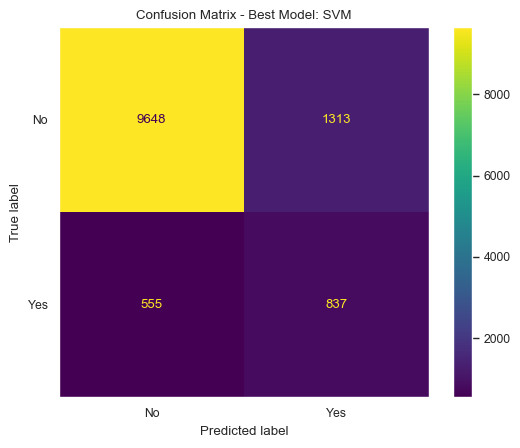

In [69]:
# confusion matrix for best model
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['No', 'Yes'])
plt.title(f'Confusion Matrix - Best Model: {best_model_name}')
plt.grid(False)

Compared to the simple logistic regression model we begun with, comparing the confusion matricies, we can see drastic:
- Increases to True Positive (bottom right): More successful client contacts can be made
- Decrease to False Negatives (bottom left): Less potential successful clients will be missed

Of course this comes at the cost of precision and an increase to False Positives (top right) but we discuss the implications next.

In [70]:
# import another way to view our model and ways to influence precision vs recall trade-off
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

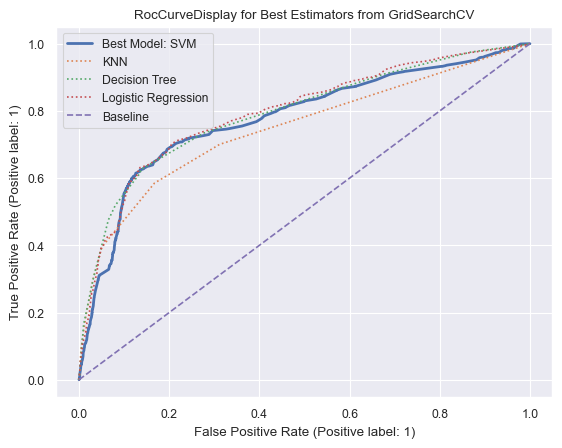

In [71]:
# roc auc curve
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(best_model, 
        X_test, y_test, pos_label = 1, ax = ax, label = 'Best Model: ' + best_model_name,
        linewidth = 2)
for model_name, grid_model in grid_models.items():
    if model_name != best_model_name:
        model = grid_model.best_estimator_
        RocCurveDisplay.from_estimator(model, 
                X_test, y_test, pos_label = 1, ax = ax, label = model_name,
                linestyle = ':')
plt.grid(True)
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'Baseline',
         linestyle = '--');
plt.title(f'RocCurveDisplay for Best Estimators from GridSearchCV')
plt.legend();

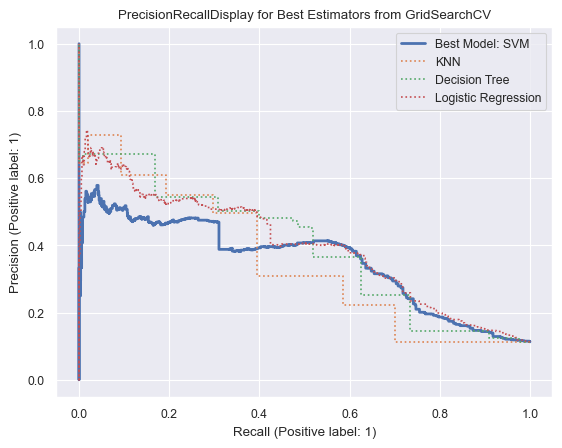

In [72]:
# pr auc curve
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_estimator(best_model, 
        X_test, y_test, pos_label = 1, ax = ax, label = 'Best Model: ' + best_model_name,
        linewidth = 2)
for model_name, grid_model in grid_models.items():
    if model_name != best_model_name:
        model = grid_model.best_estimator_
        PrecisionRecallDisplay.from_estimator(model, 
                X_test, y_test, pos_label = 1, ax = ax, label = model_name,
                linestyle = ':')
plt.grid(True)
plt.title(f'PrecisionRecallDisplay for Best Estimators from GridSearchCV')
plt.legend();

### Summary

**Objective**

Once again, the business objective for the Portugese banking institution is to allocate resources effectively such that marketing campaigns maximize successful bank term deposit subscriptions while minimizing contacts (phone calls) required.

Put another way, the business is ideally able to better target clients who would be interested in a term deposit so that it can either:
1. deploy the same amount of contacts and yield more term deposits (bigger pot) or
2. deploy less contacts but still yield the same amount of term deposits (if resources are scarce).

**Baseline performance**

Calling this **success rate** going forward, the baseline currently is:
- 8% for the whole campaign database considered (79.3K), and 
- 11% for naively predicting 'success' for every client based on the imported data (41.1K)

**Data Available**

The business data available includes 41.1K marketing campaign contacts with features across bank client data, current and previous campaign attributes, and socialeconomic context. Importantly, it includes whether the client subscribed to a term deposit.

**Methodology and Results**

From this data, we created the optimal model using the top features correlating to successful calls. The features included:

- **Contact communication type**,
- **Previous campaign outcome**,
- **Last contact month of year**, and
- **Socioeconomic context**, comprising of
    - employment variaton rate (emp.var.rate)
    - consumer price index (cons.price.idx)
    - euribor 3 month rate (euribor3m)

With this model, we were able to achieve 84% prediction accuracy. This effectively allows the business to hit a success rate of 38% which is more than 4X the status quo of 8%. Importantly, the model also produces the largest list of prospective clients to contact. In improving economic conditions, this will help maximize the pot assuming resources are available.

**Bottom Line**

For every 1000 client contact the business makes, this model can help yield 300 more successful bank term deposit subscriptions. While future improvements can further enhance results, this yields measurable benefits if the business adopts the predictive results.

### Next steps and recommendations

To continue improving our models, we propose making further data mining investments:
- In the short term: 
    - commit compute resources to allow inclusion of more features
    - tune hyperparameters across a broader parameter surface
- And long term: 
    - collect and include more impactful client specific features

Again, we recommend deploying the current model to yield business benefits right away while the above improvements can be made in the near future.